In [2]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import os


# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler,StandardScaler, Normalizer

In [3]:
file_path=r'D:\PythonDev\MyQuantFinProject\Data'
file_name='Indy_SET50_Spy_y21-22.csv'

In [4]:
data_file=os.path.join(file_path,file_name)

fromDate='2021-01-01'
toDate='2022-11'



In [6]:
df=pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df=df[fromDate:toDate]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 944 entries, 2021-01-04 to 2022-11-30
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticker             944 non-null    object 
 1   MACD_Long          944 non-null    float64
 2   SignalOfMACD_Long  944 non-null    float64
 3   Hist_Long          944 non-null    float64
 4   MACD_Per_Signal    944 non-null    float64
 5   RSI_Long           944 non-null    float64
 6   MAOfRSI_Long       944 non-null    float64
 7   Close              944 non-null    float64
dtypes: float64(7), object(1)
memory usage: 66.4+ KB
None


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_17904\3138298860.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df=df[fromDate:toDate]


In [10]:
col_dist=['Hist_Long','RSI_Long','Close']
# col_dist=['MACD_Per_Signal','Hist_Long','RSI_Long','Close']
# col_dist=['Hist_Long','RSI_Long','Close']

col_box=['RSI_Long','MAOfRSI_Long']

col_corr=['MACD_Long','RSI_Long','Close']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2338 entries, 2021-01-01 to 2022-04-06
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticker             2338 non-null   object 
 1   MACD_Long          2338 non-null   float64
 2   SignalOfMACD_Long  2338 non-null   float64
 3   Hist_Long          2338 non-null   float64
 4   RSI_Long           2338 non-null   float64
 5   MAOfRSI_Long       2338 non-null   float64
 6   Close              2338 non-null   float64
dtypes: float64(6), object(1)
memory usage: 146.1+ KB
None


In [12]:
df.head()

,Ticker,Hist_Long,RSI_Long,Close
Date/Time,,,,
2022-01-01,BNB-USD,-1.33,45.55,527.35
2022-01-02,BNB-USD,-0.21,46.68,531.40
2022-01-03,BNB-USD,-1.12,42.19,512.14
2022-01-04,BNB-USD,-2.00,41.17,507.51
2022-01-05,BNB-USD,-5.42,34.84,475.06


In [13]:
df.tail()

,Ticker,Hist_Long,RSI_Long,Close
Date/Time,,,,
2022-04-02,BTC-USD,657.91,60.07,45868.95
2022-04-03,BTC-USD,551.18,61.86,46453.57
2022-04-04,BTC-USD,458.22,62.38,46622.68
2022-04-05,BTC-USD,261.45,57.10,45555.99
2022-04-06,BTC-USD,-118.70,47.59,43206.74


In [14]:

list_symbol=df['Ticker'].unique().tolist()

# list_symbol=['ETH','AVAX']
print(list_symbol)

['BNB-USD', 'ACWI', 'QQQ', 'ETH-USD', 'SPY', 'BTC-USD']


In [15]:
print("Plot distribution")

import scipy.stats as stats

def plot_dist(df_x,col_dist,col_symbol):
    std_x=1.5

    # Plot the distribution as a histogram
    x = df_x[col_dist]
    m = x.mean()
    md = x.median()
    sd = x.std()
    moe2 = m - (sd * std_x)
    moe1 = m + (sd * std_x)

    fig = plt.figure(figsize = (12, 8))
    
    density = stats.gaussian_kde(x)
     
    n, x, _ = plt.hist(x,density=True ,alpha = 0.7)  
    plt.plot(x, density(x)*1.2)
    
    plt.axvline(m, color='magenta', linestyle='dashed', linewidth=4)
    plt.axvline(md, color='orange', linestyle='dashed', linewidth=4)
    plt.axvline(moe1, color='green', linestyle='solid', linewidth=2)
    plt.axvline(moe2, color='green', linestyle='solid', linewidth=2)
    
    plt.xlabel(f'{col_dist} Value')
    plt.ylabel('Freq')
  
    plt.title(f'{symbol}-{col_dist} || {fromDate} - {toDate}',fontweight ="bold")
    plt.show()    

    print('Mean: ' + str(round(m,2)))
    print('Median: ' + str(round(md,2)))            
    print('StdDev: ' + str( round( sd,2)   ))
    print(f'{std_x}SD: ' + str(round(moe1,2)))
    print(f'-{std_x}SD: ' + str(round(moe2,2)))
    
  

Plot distribution


BNB-USD - 97 days


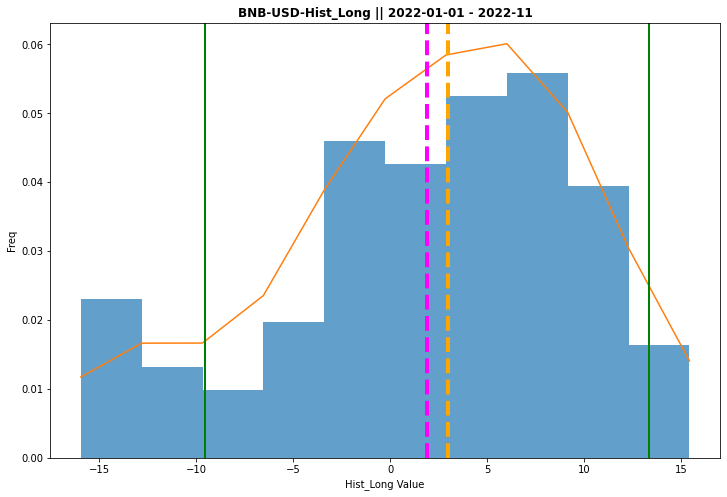

Mean: 1.9
Median: 3.0
StdDev: 7.65
1.5SD: 13.37
-1.5SD: -9.57


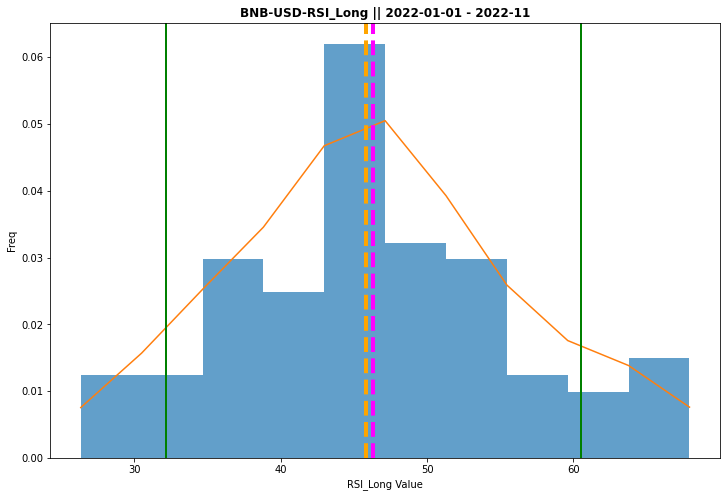

Mean: 46.34
Median: 45.85
StdDev: 9.45
1.5SD: 60.51
-1.5SD: 32.17


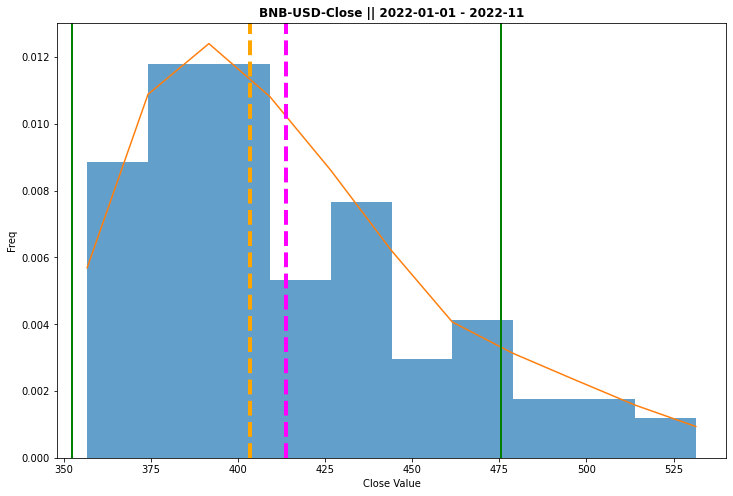

Mean: 413.88
Median: 403.39
StdDev: 41.1
1.5SD: 475.53
-1.5SD: 352.23
ACWI - 66 days


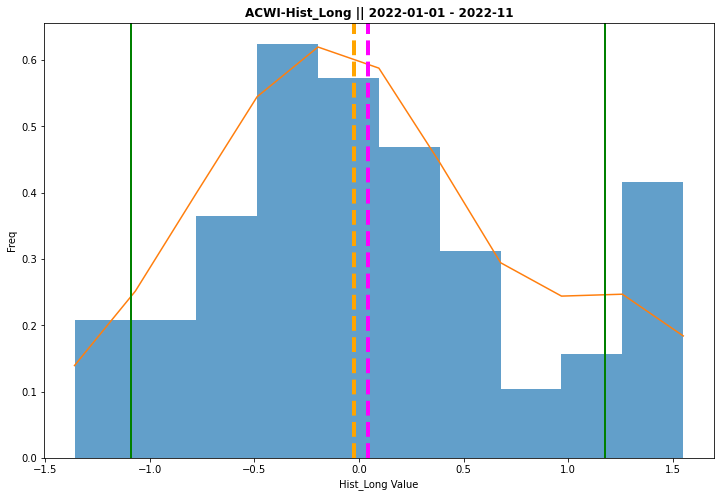

Mean: 0.04
Median: -0.02
StdDev: 0.76
1.5SD: 1.17
-1.5SD: -1.09


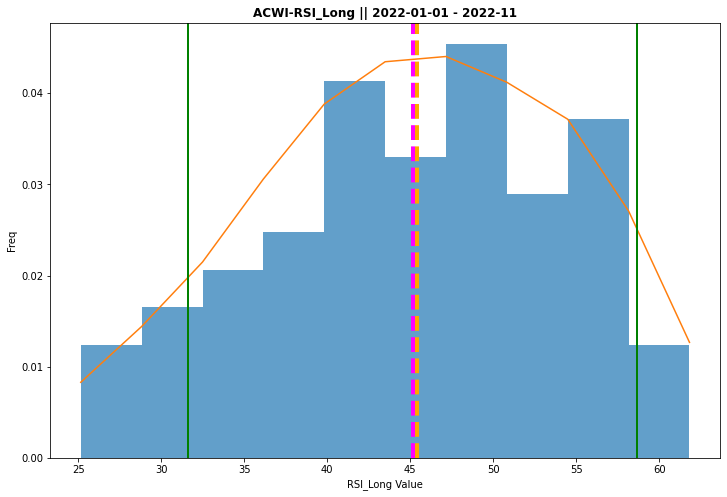

Mean: 45.15
Median: 45.42
StdDev: 9.03
1.5SD: 58.69
-1.5SD: 31.6


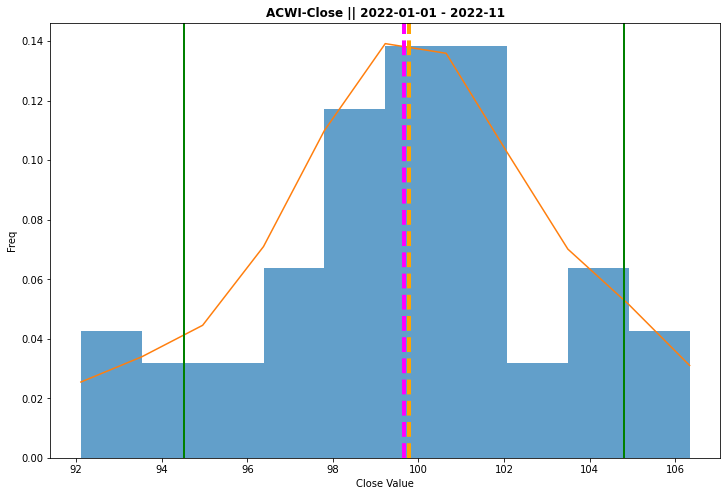

Mean: 99.67
Median: 99.78
StdDev: 3.43
1.5SD: 104.81
-1.5SD: 94.52
QQQ - 66 days


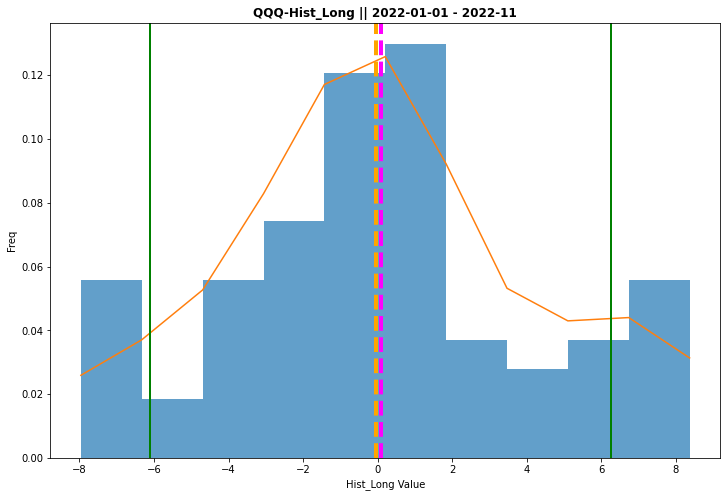

Mean: 0.08
Median: -0.03
StdDev: 4.12
1.5SD: 6.26
-1.5SD: -6.1


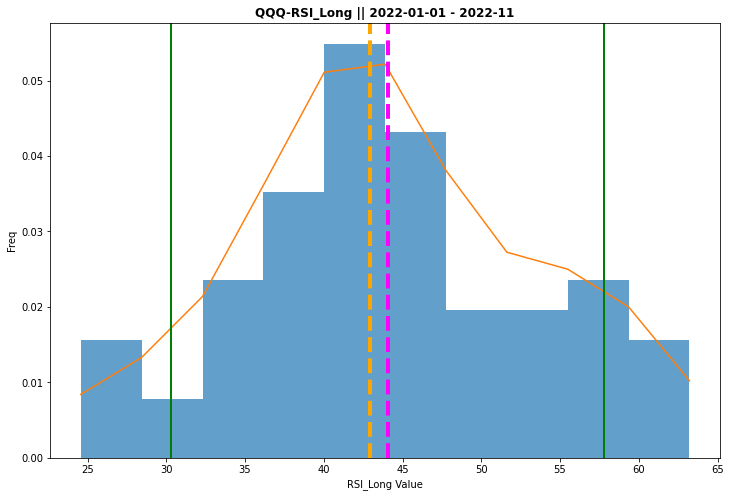

Mean: 44.06
Median: 42.9
StdDev: 9.15
1.5SD: 57.79
-1.5SD: 30.33


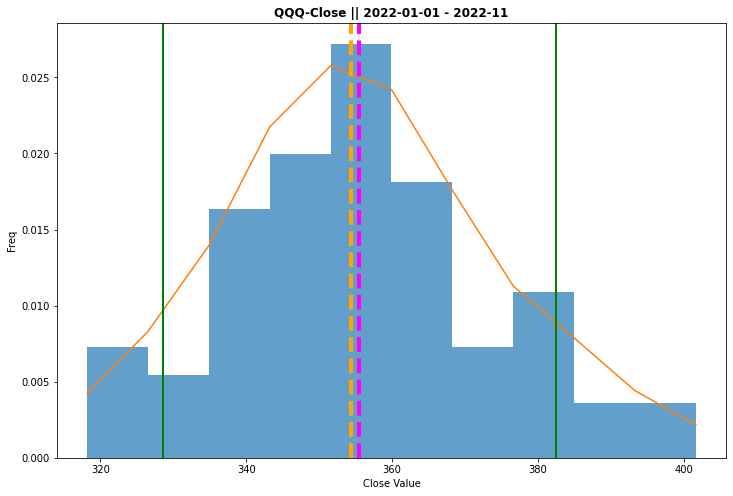

Mean: 355.53
Median: 354.34
StdDev: 17.94
1.5SD: 382.44
-1.5SD: 328.62
ETH-USD - 96 days


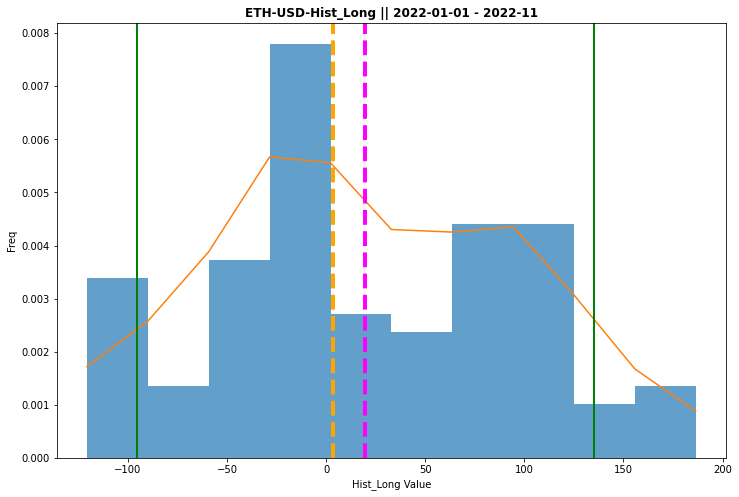

Mean: 19.75
Median: 3.55
StdDev: 76.86
1.5SD: 135.03
-1.5SD: -95.54


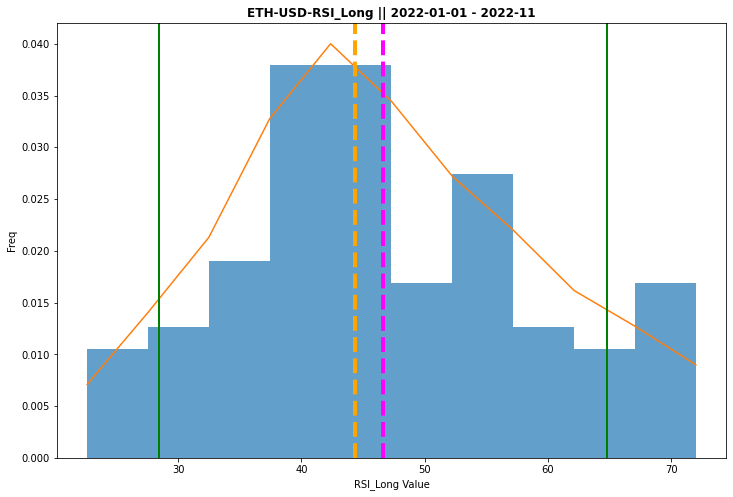

Mean: 46.61
Median: 44.36
StdDev: 12.12
1.5SD: 64.79
-1.5SD: 28.42


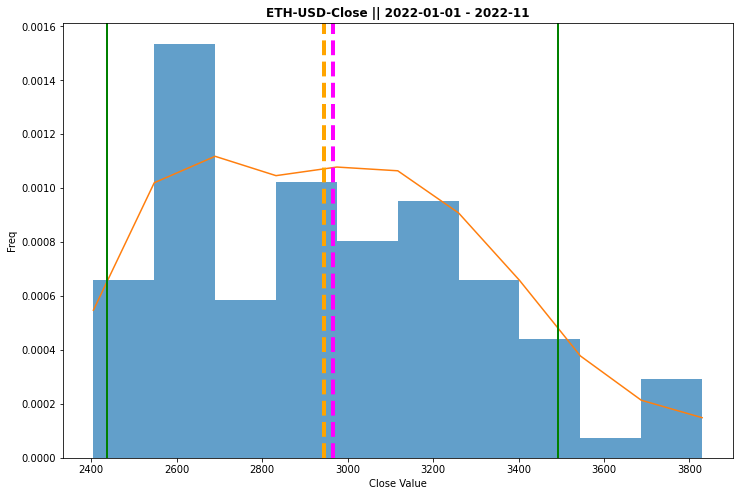

Mean: 2965.54
Median: 2945.8
StdDev: 351.69
1.5SD: 3493.07
-1.5SD: 2438.01
SPY - 66 days


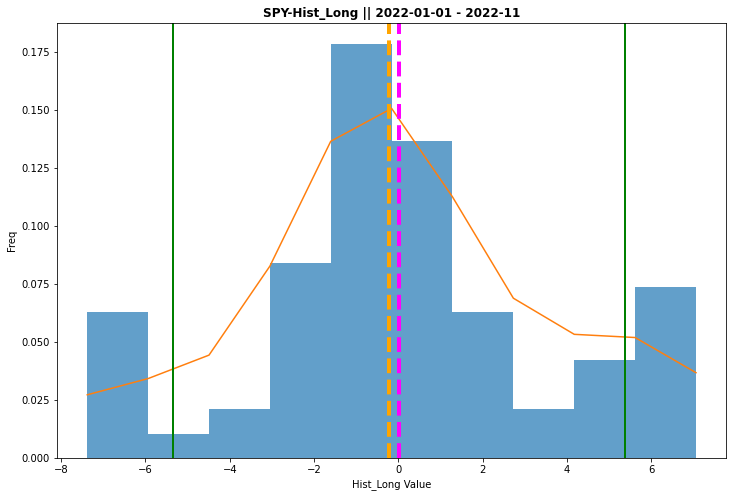

Mean: 0.02
Median: -0.23
StdDev: 3.57
1.5SD: 5.38
-1.5SD: -5.35


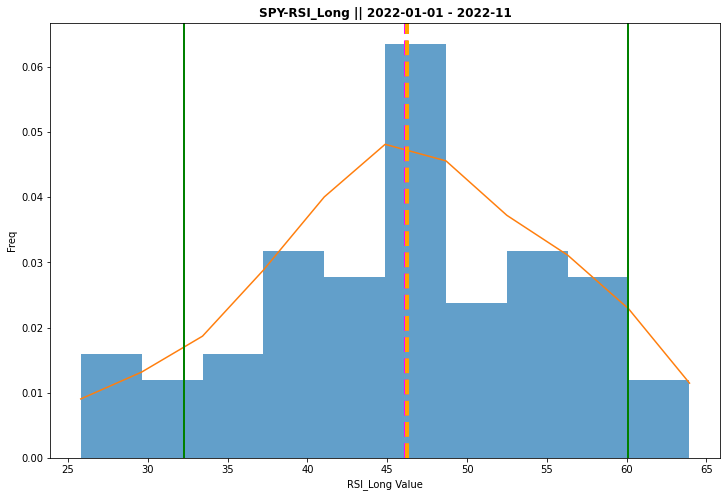

Mean: 46.16
Median: 46.24
StdDev: 9.27
1.5SD: 60.06
-1.5SD: 32.26


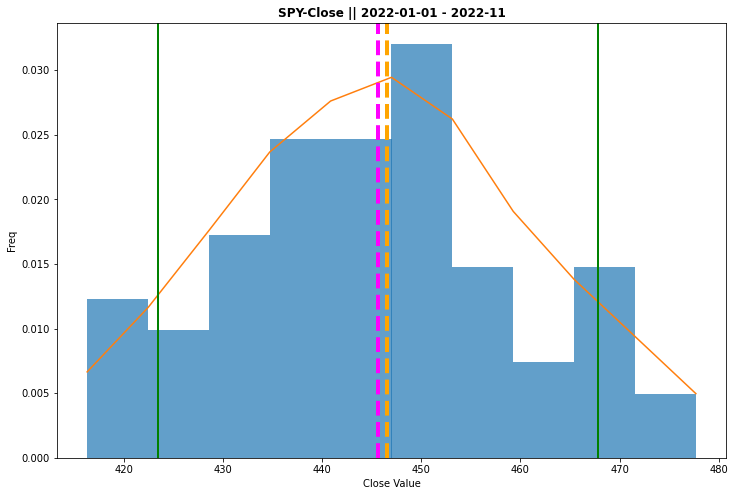

Mean: 445.61
Median: 446.56
StdDev: 14.79
1.5SD: 467.8
-1.5SD: 423.42
BTC-USD - 96 days


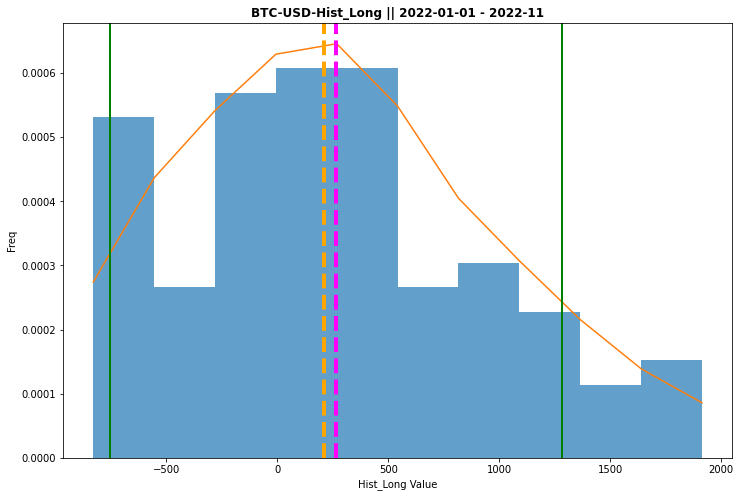

Mean: 265.39
Median: 212.38
StdDev: 679.58
1.5SD: 1284.77
-1.5SD: -753.98


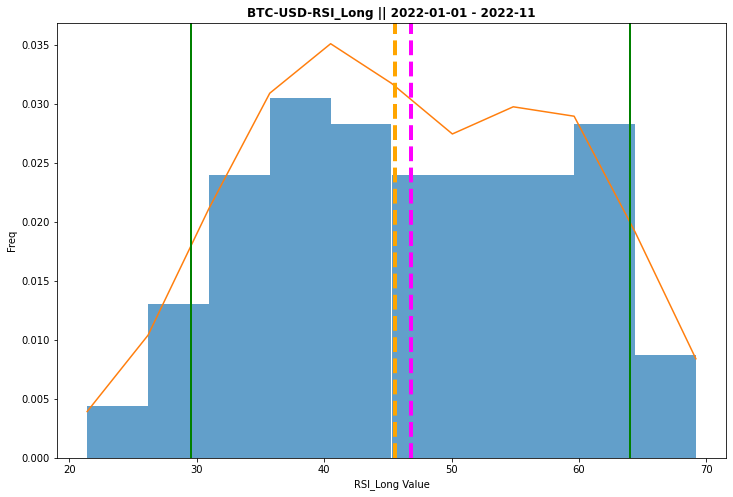

Mean: 46.81
Median: 45.54
StdDev: 11.48
1.5SD: 64.02
-1.5SD: 29.59


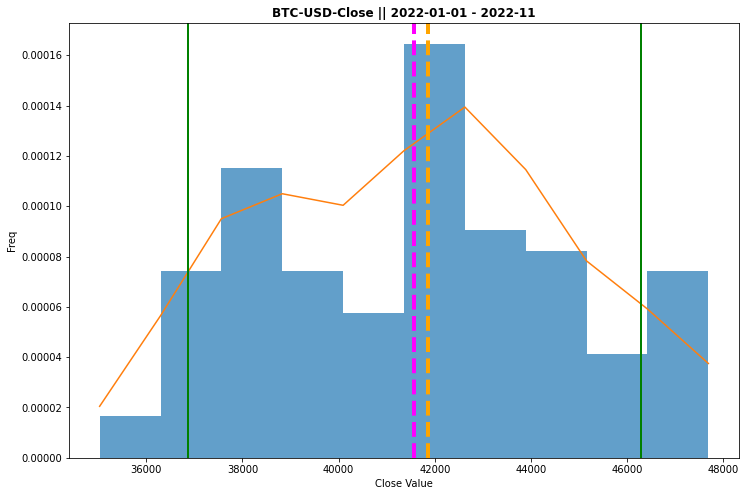

Mean: 41572.51
Median: 41866.43
StdDev: 3138.08
1.5SD: 46279.64
-1.5SD: 36865.39


In [16]:
for symbol in list_symbol:
  
  df_by_symbol=df.query('Ticker==@symbol')   
  df_by_symbol=df_by_symbol.drop(columns=['Ticker'])  
  print(f'{symbol} - {len(df_by_symbol)} days')  
#   print(df_by_symbol.head()) 
#   print(df_by_symbol.tail()) 
  
  for col in df_by_symbol.columns:
    plot_dist(df_by_symbol,col,symbol)
    
  print("====================================================================")  


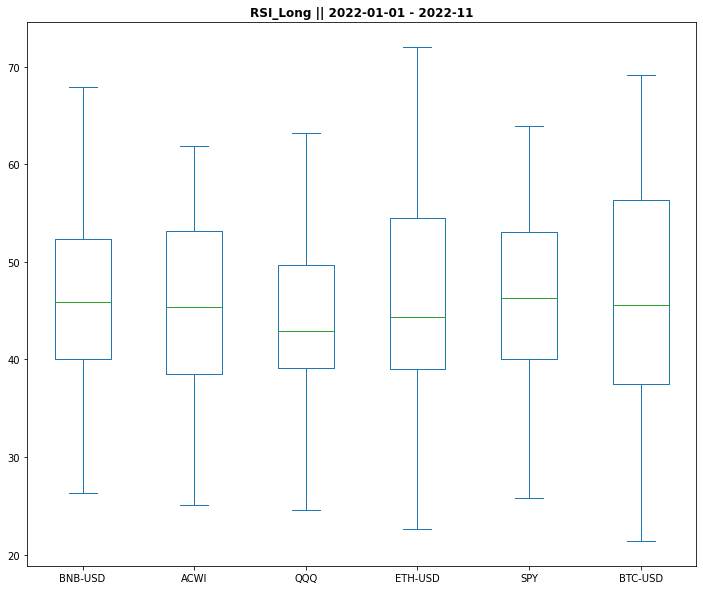

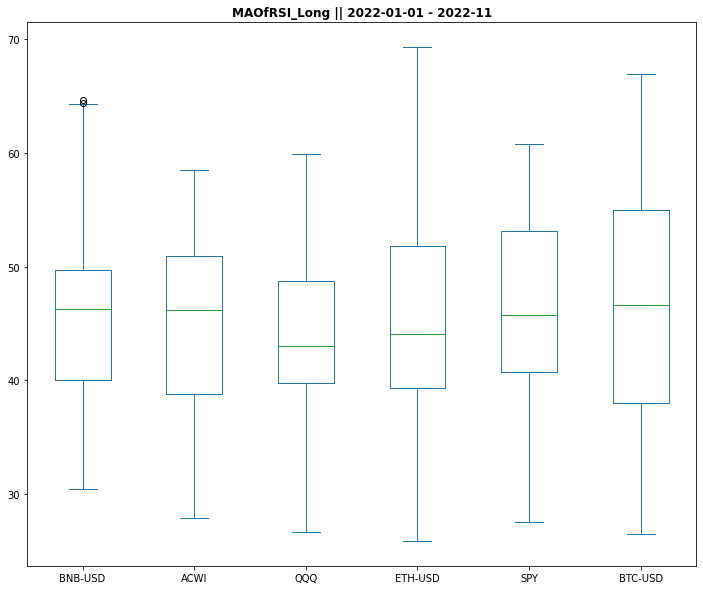

In [20]:

# col_box=['Hist_Long','RSI_Long','MAOfRSI_Long','Close']

df=range_df[['Ticker']+col_box].loc[fromDate:toDate]
df.head()



def plot_box(col_box):
# def plot_box(col_box,required_scaled):
    pd_box=pd.DataFrame()

    for symbol in list_symbol:

      df_by_symbol=df.query('Ticker==@symbol')[[col_box]]   
      df_by_symbol=df_by_symbol.rename(columns={col_box:f'{symbol}'})   

      pd_box=pd.concat([pd_box, df_by_symbol], axis=1)
    
    
#     if required_scaled:
#      scaler = MinMaxScaler()
#      scaler= StandardScaler()
#       scaler=Normalizer()
#      pd_box[pd_box.columns.tolist()] = scaler.fit_transform(pd_box[pd_box.columns.tolist()])

#     print(pd_box.tail())
    
    pd_box.plot(kind='box', title='Distribution', figsize = (12,10))
    plt.title(f'{col_box} || {fromDate} - {toDate}',fontweight ="bold")
    plt.show()


#     print(pd_box.head()) 
#     print(pd_box.tail()) 

for x in col_box:  
 plot_box(x)  

In [22]:
range_df

,Ticker,MACD_Long,SignalOfMACD_Long,Hist_Long,RSI_Long,MAOfRSI_Long,Close
Date/Time,,,,,,,
2021-01-01,BNB-USD,2.43,1.32,1.11,66.22,67.29,37.91
2021-01-02,BNB-USD,2.50,1.44,1.05,66.95,67.59,38.24
2021-01-03,BNB-USD,2.82,1.59,1.23,72.48,67.78,41.15
2021-01-04,BNB-USD,3.00,1.74,1.26,71.50,68.45,40.93
2021-01-05,BNB-USD,3.18,1.89,1.29,72.93,70.02,41.73
...,...,...,...,...,...,...,...
2022-04-02,BTC-USD,1841.47,1183.56,657.91,60.07,63.64,45868.95
2022-04-03,BTC-USD,1799.59,1248.41,551.18,61.86,62.17,46453.57
2022-04-04,BTC-USD,1760.53,1302.31,458.22,62.38,61.23,46622.68


['MACD_Long', 'RSI_Long', 'Close']


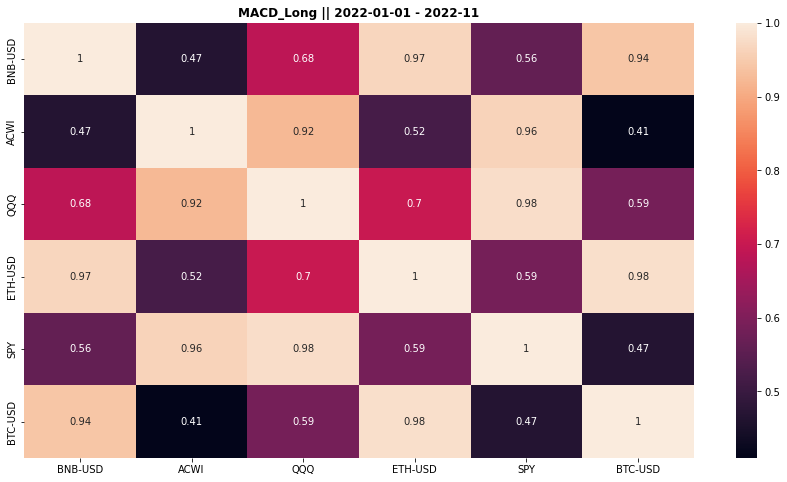

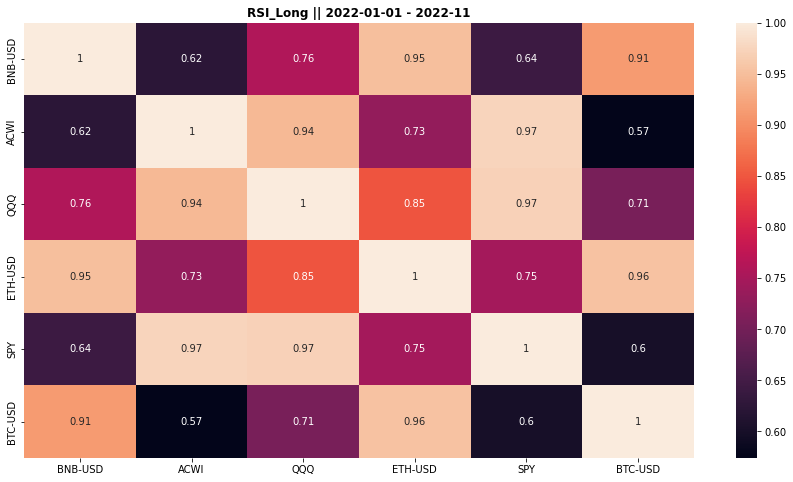

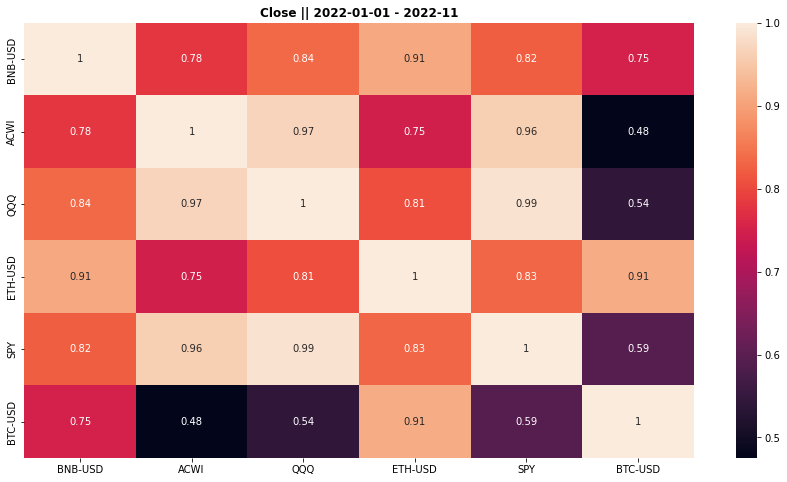

In [ ]:
df=range_df[['Ticker']+col_corr].loc[fromDate:toDate]
df.head()


print(col_corr)

for col in col_corr:  
    pd_corr=pd.DataFrame()
    for symbol in list_symbol:

      df_by_symbol=df.query('Ticker==@symbol')[[col]]
      df_by_symbol=df_by_symbol.rename(columns={col:symbol})   
      #print(df_by_symbol)  
      pd_corr=pd.concat([pd_corr, df_by_symbol], axis=1)
        
    corrMatrix = pd_corr.corr()
    plt.figure(figsize = (15,8))
    plt.title(f'{col} || {fromDate} - {toDate}',fontweight ="bold")
    
    sn.heatmap(corrMatrix, annot=True)
    plt.show()
    
#     print(pd_corr)